In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [103]:
# Field ordering: name, year start, month start, year end, month end, category, funder, next destination.
# Special case: if a person has held more than one role, list them in adjacent entries in chronological order,
#               and put the *original* start date in all entries (this ensures subsequent code keeps them together)
members = [
    ['Jonathan Taylor', 2013, 1, None, None, 'PI', None, None],
    ['Vytautas Zickus', 2014, 9, 2018, 6, 'PhD student', 'EPSRC', 'Postdoc (Edinburgh)'],
    ['Chiara Garbellotto', 2015, 10, 2019, 8, 'PhD student', 'EPSRC', 'Teaching'],
    ['Une Butaite', 2016, 10, 2020, 6, 'PhD student', 'EPSRC', 'Postdoc (Exeter)'],
    ['Daniel Olesker', 2018, 10, 2022, 9, 'PhD student', 'EPSRC', None],
    ['Daniel Olesker', 2018, 10, 2022, 12, 'Postdoc', 'G.U.', 'Industry (microscopy)'],
    ['Karlin Ross', 2022, 9, 2026, 8, 'PhD student', 'MRS', None],
    ['Aiven Moorhead', 2023, 10, 2027, 6, 'PhD student', 'EPSRC', None],
    ['Jiawen Jiang', 2023, 10, 2027, 3, 'PhD student', 'Other', None],
    ['Chas Nelson', 2017, 4, 2018, 7, 'Postdoc', 'BHF', None],
    ['Chas Nelson', 2017, 4, 2020, 8, 'Research fellow', 'BHF', 'Spinout (imaging)'],
    ['Caroline Muellenbroich', 2018, 9, 2021, 8, 'Research fellow', 'RSE, ERC', 'Academic position'],
    ['Sama Daryanavard', 2015, 6, 2015, 8, 'Vacation scholar', 'EPSRC', None],
    ['Alex Drysdale', 2019, 6, 2019, 8, 'Vacation scholar', 'Carnegie', None],
    ['Ross Clark', 2021, 6, 2021, 8, 'Vacation scholar', 'Carnegie', None],
    ['Katarzyna Glinka', 2022, 6, 2022, 8, 'Vacation scholar', 'Carnegie', None],
    ['Alex Hargreaves', 2015, 7, 2017, 2, 'Postdoc', 'BHF', 'Postdoc (York)'],
    ['Tom Mitchell', 2017, 2, 2018, 2, 'Postdoc', 'EPSRC', 'Industry (microscopy)'],
    ['Kyle Nutt', 2021, 6, 2022, 9, 'Research assistant', 'EPSRC/QuantIC', 'Industry (data science)'],
    ['Cameron Wilson', 2021, 9, 2022, 9, 'Research assistant', 'BBSRC', 'Further study (Imperial)'],
    ['Gergely Ferenczi', 2021, 12, 2022, 5, 'Postdoc', 'BBSRC', 'Industry (software)']
]

def DecimalYear(pair):
    return pair[0]+(pair[1]-1)/12

# Sort by start date
def CompareStartDate(member):
    return DecimalYear(member[1:])
members = sorted(members, key=CompareStartDate)

colorLookup = { 'PI': 'blue',
                'PhD student': 'green',
                'PhD student/postdoc': 'green',
                'Postdoc': 'orange',
                'Research assistant': 'orange',
                'Research fellow': 'yellow',
                'Vacation scholar': 'pink'}

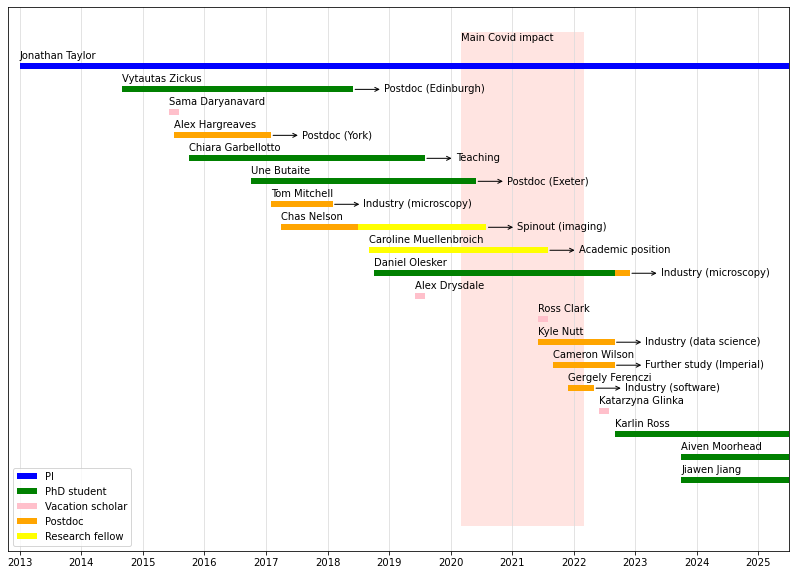

In [104]:
plt.figure(figsize=(14,10))

y = len(members)

# Draw a patch to represent Covid impact
covidStart = DecimalYear([2020,3])
covid = patches.Rectangle((covidStart, 0), 2, len(members)+0.5,
                          linewidth=0, edgecolor='r', facecolor='mistyrose')
plt.gca().add_patch(covid)
plt.annotate('Main Covid impact', (covidStart,y+0.1))#, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)[source]#

# Draw each group member's timeline
prevMem = None
seen = dict()
for mem in members:
    # If a continuation of the previous entry (same person), keep it on the same line
    continuation = ((prevMem is not None) and (mem[0] == prevMem[0]))
    if not continuation:
        y -= 1
    # Figure out start date in this role (special-casing continuing people)
    x0 = DecimalYear(mem[1:])
    if mem[3] is not None:
        if continuation:
            x0 = DecimalYear(prevMem[3:])
        x1 = DecimalYear(mem[3:])
    else:
        x1 = 2040
    # Colour-code by role
    color = colorLookup[mem[5]]
    # Build up a key for the colour-codes
    label = None
    if not color in seen:
        label = mem[5]
    plt.plot([x0, x1], [y, y], linewidth=6, color=color, label=label, solid_capstyle='butt')
    seen[color] = 1
    # Annotate with the person's name
    if not continuation:
        plt.annotate(mem[0], (x0,y+0.3))
    # Annotate with their next destination
    if mem[7] is not None:
        plt.annotate(f'{mem[7]}', 
                     xy=(x1,y), 
                     xytext=(x1+0.5,y),
                     va='center',
                     arrowprops=dict(arrowstyle= '<-',color='black',lw=1,ls='-'))
    prevMem = mem
plt.legend()
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.grid(visible=True, axis='x', which='major', color='gainsboro')
plt.xticks(range(2013,2040))
plt.xlim(2012.8, 2025.5)
plt.savefig('timeline.png', dpi=300)
plt.show()
    